#### **1. IMPORTING REQUIRED LIBRARIES**

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer 
import seaborn as sns

#### **2. IMPORTING DATASET**

In [56]:
df = pd.read_csv('C:\\Users\\Kamlesh P Panchal\\Documents\\Infosys Internship\\train_og\Train.csv')
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [58]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [59]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (8523, 12)


#### **3. HANDLING MISSING VALUES**

In [60]:
# checking missing values
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [61]:
# Finding the mean of 'Item_Visibility' where it is greater than 0, as a placeholder for missing values
non_zero_mean = df.loc[df['Item_Visibility'] > 0, 'Item_Visibility'].mean()

In [62]:
# Filling missing 'Item_Weight' based on median of 'Item_Type'.
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('median'))

In [63]:
# Filling missing 'Outlet_Size' with the mode of each 'Outlet_Type' group.
df['Outlet_Size'] = df['Outlet_Size'].fillna(df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'))

In [64]:
#Feature Encoding
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [65]:
# Checking for duplicates and removing them if any
df.drop_duplicates(inplace=True)

In [66]:
print(df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [67]:
# saving the filled dataset
df.to_csv('processed_train.csv', index=False)

#### **4. UPLOADING THE PROCESSED DATA**

In [68]:
p_df = pd.read_csv("processed_train.csv")
p_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


#### **5. DATA VISUALIZATION**

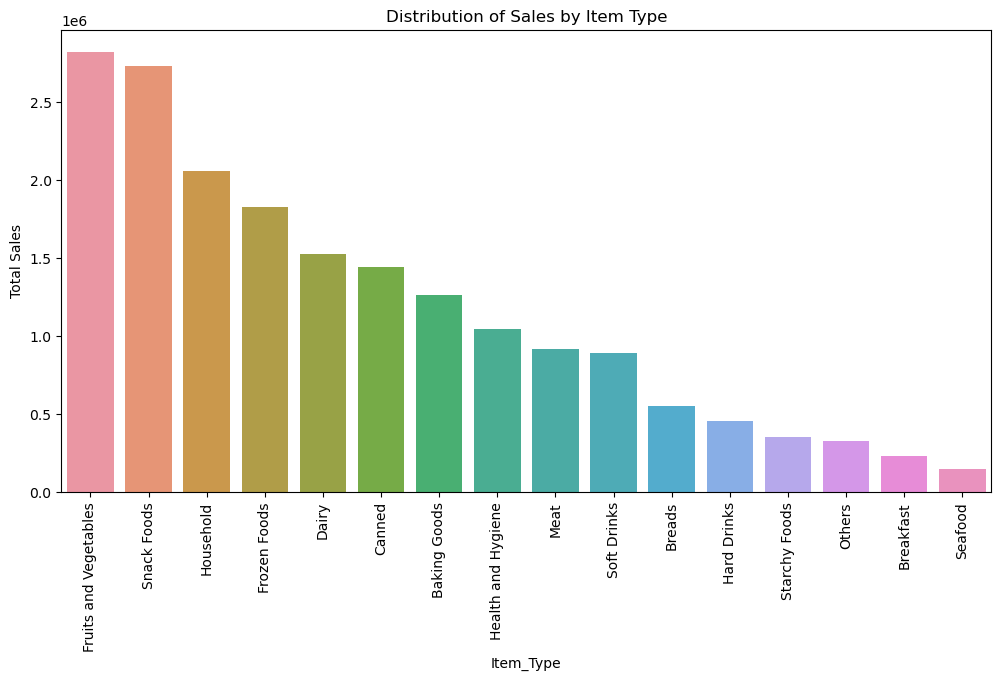

In [69]:
# Bar plot of total sales by Item Type
# Shows total sales for each item type, making it easy to see which items sell the most.

sorted_data = p_df.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index().sort_values(by='Item_Outlet_Sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=sorted_data, ci=None)
plt.xticks(rotation=90)
plt.title('Distribution of Sales by Item Type')
plt.ylabel('Total Sales')
plt.show()

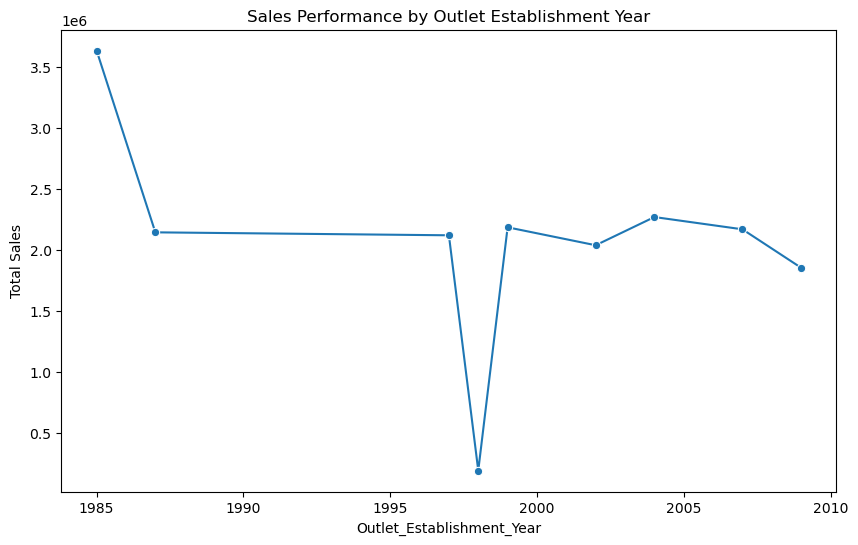

In [70]:
# Line plot for Sales Performance by Outlet Establishment Year
# Tracks total sales over the years to observe if older outlets have higher sales.

p_df_year_sales = p_df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=p_df_year_sales, marker='o')
plt.title('Sales Performance by Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.show()



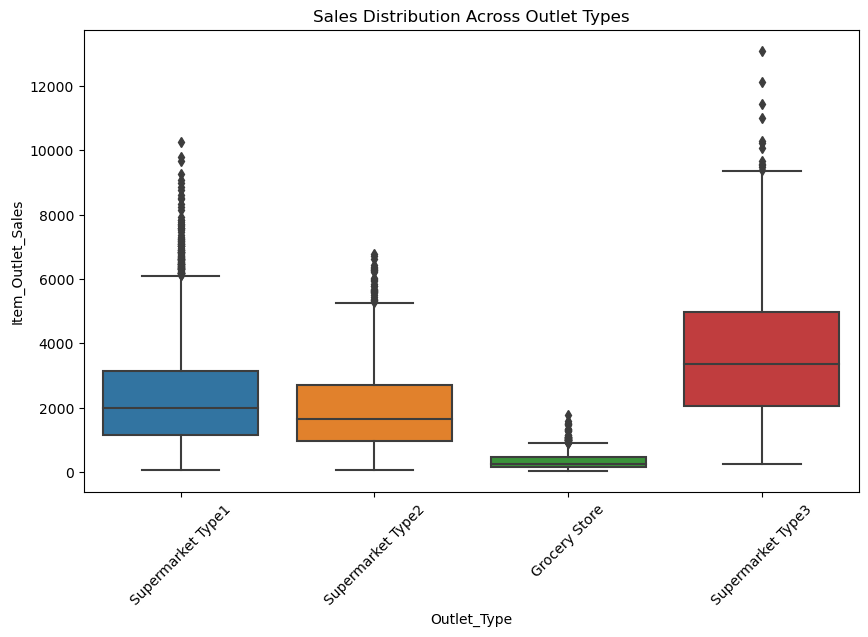

In [71]:
# Box plot of sales across Outlet Types
# Compares sales distribution by outlet type, showing which types generally have higher or lower sales.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=p_df)
plt.title('Sales Distribution Across Outlet Types')
plt.xticks(rotation=45)
plt.show()


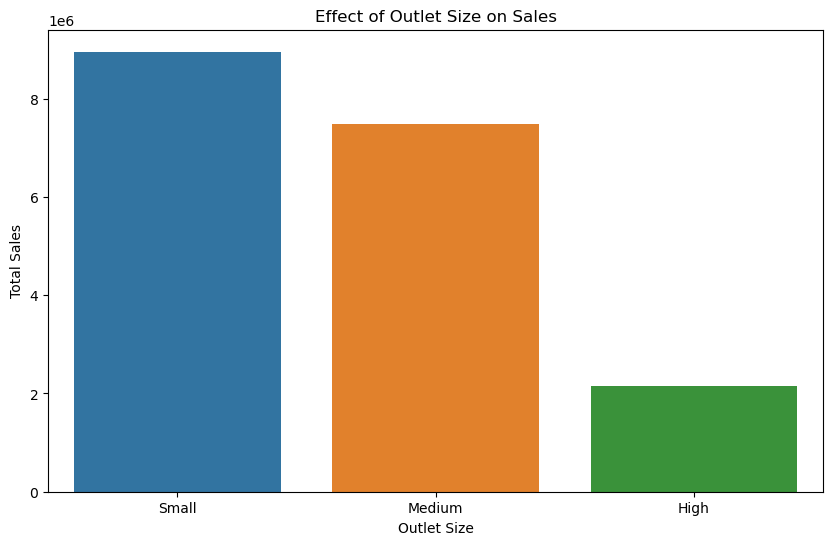

In [72]:
# Bar plot of sales by Outlet Size
# Shows total sales for each outlet size, helping to see if bigger outlets perform better.

sorted_data = p_df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().reset_index().sort_values(by='Item_Outlet_Sales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=sorted_data, ci=None)
plt.title('Effect of Outlet Size on Sales')
plt.ylabel('Total Sales')
plt.xlabel('Outlet Size')
plt.show()

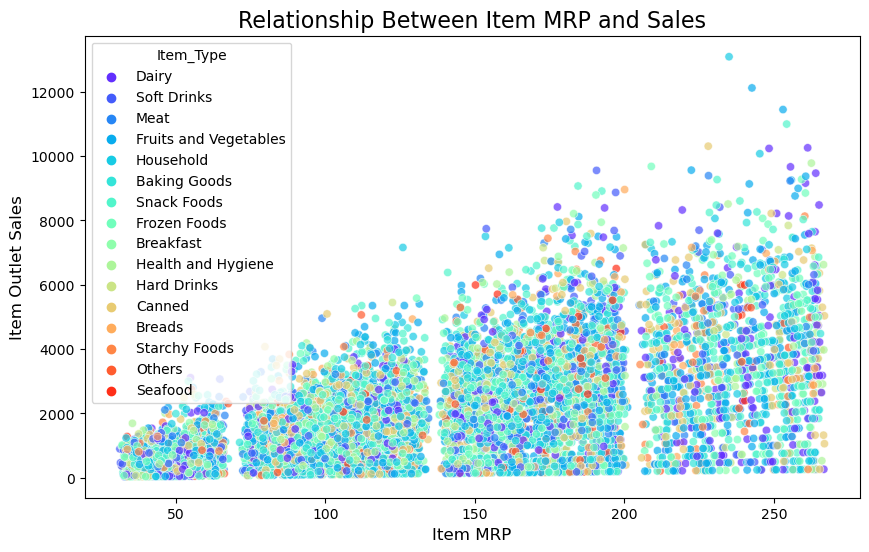

In [73]:
# Relationship Between Item MRP and Sales (Scatter Plot)
# Displays how item price (MRP) affects sales, with colors representing different item types.

plt.figure(figsize=(10,6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=p_df, hue='Item_Type', palette="rainbow", alpha=0.7)
plt.title('Relationship Between Item MRP and Sales', fontsize=16)
plt.xlabel('Item MRP', fontsize=12)
plt.ylabel('Item Outlet Sales', fontsize=12)
plt.show()

ADDITIONAL VISUALIZATIONS

<Figure size 1500x1000 with 0 Axes>

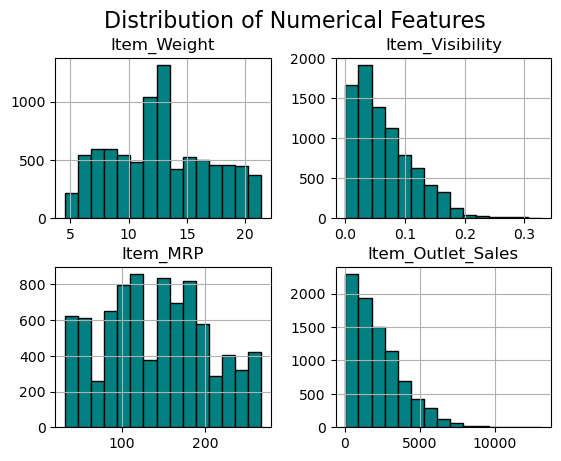

In [74]:
# Distribution of numerical features
# Histograms for each numerical feature to see their distribution, like average or spread of values.

# defining numerical values
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

plt.figure(figsize=(15, 10))
df[numerical_columns].hist(bins=15, color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


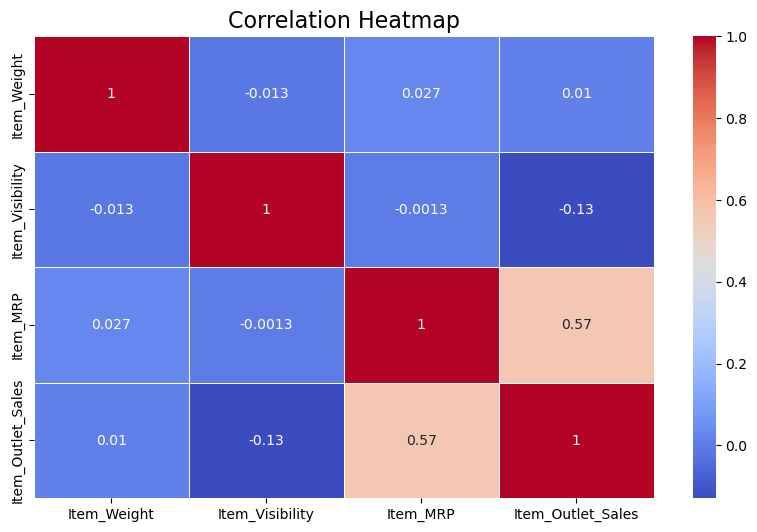

In [75]:
# Correlation Heatmap
# Shows correlations among numerical features, highlighting strong positive or negative relationships.

plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

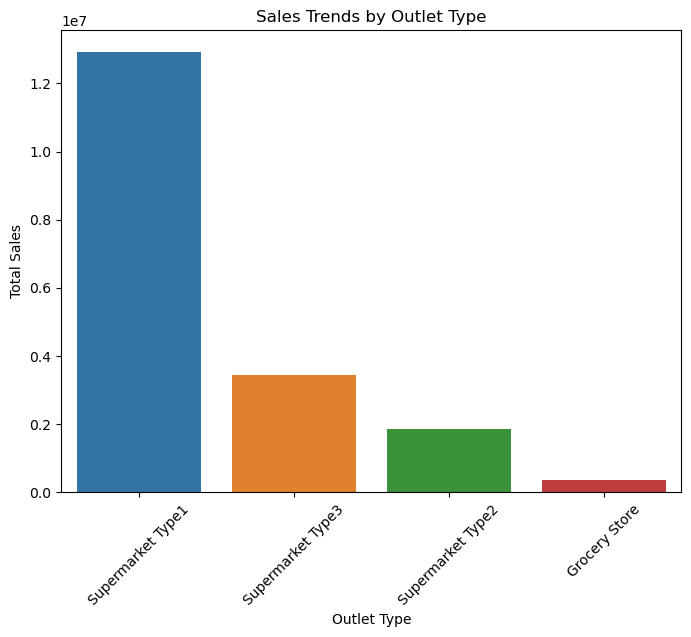

In [76]:
# Bar plot of sales by Outlet Type
# Shows total sales by outlet type, helping to identify which types have the highest sales.

p_df_outlet_sales = p_df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().reset_index()
p_df_outlet_sales = p_df_outlet_sales.sort_values(by='Item_Outlet_Sales', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=p_df_outlet_sales)
plt.title('Sales Trends by Outlet Type')
plt.ylabel('Total Sales')
plt.xlabel('Outlet Type')
plt.xticks(rotation=45)
plt.show()

#### **6. UNIVARIATE ANALYSIS**

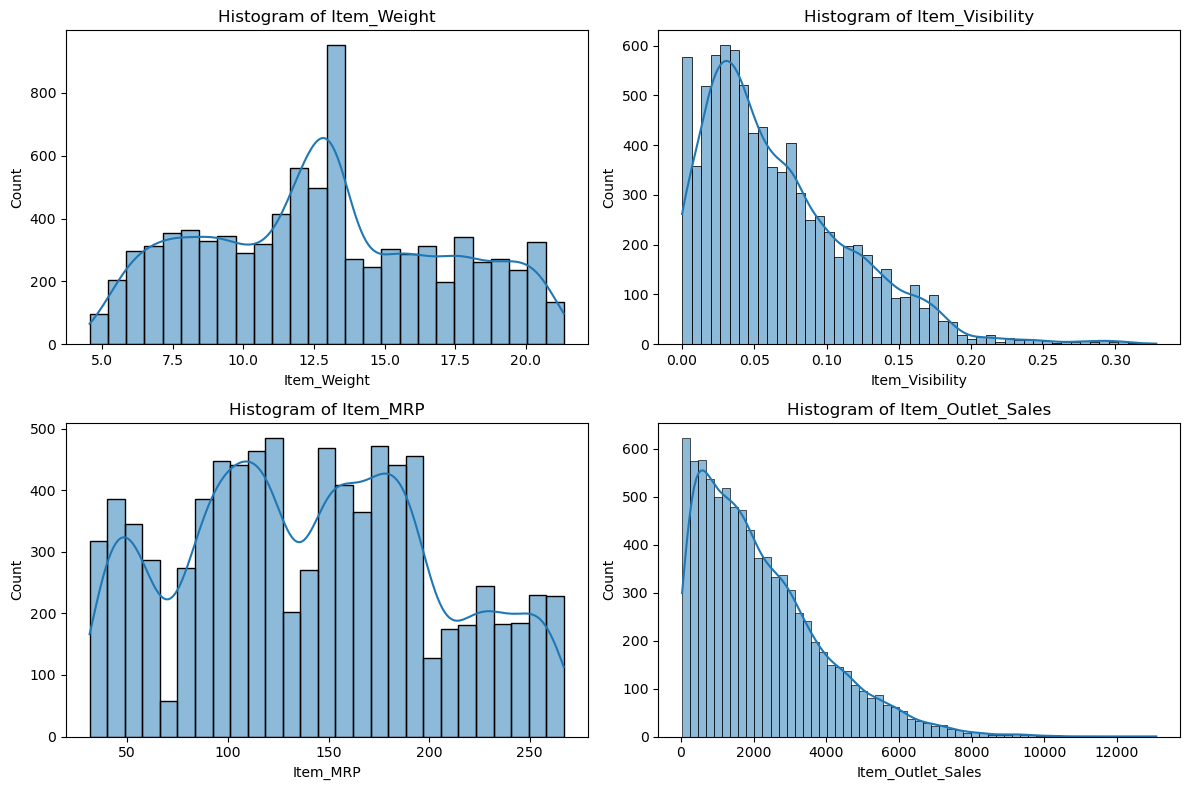

In [77]:
# Histograms of numerical features
# Shows distribution of each numerical feature to identify common or outlying values.

numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(2, 2, numerical_features.index(feature) + 1)
    sns.histplot(p_df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()


#### **8. CATEGORICAL ANALYSIS**

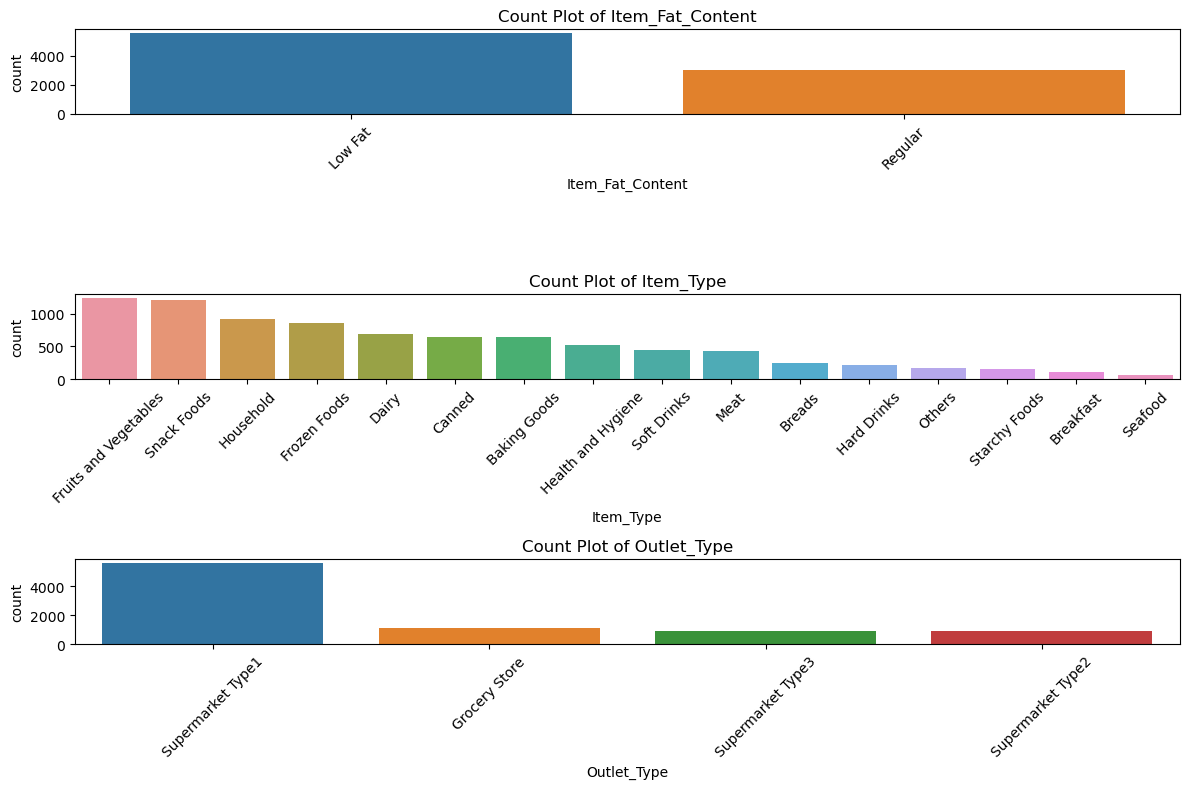

In [78]:
# Count plot of each categorical feature
# Visualizes counts for each category in selected features to understand feature popularity or balance.

categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Type']

plt.figure(figsize=(12, 8))  

# Loop through each categorical feature to create sorted count plots
for idx, feature in enumerate(categorical_features):
    # Creating a subplot for each feature (3 rows, 1 column for vertical stacking)
    plt.subplot(3, 1, idx + 1)
    
    # Sorting the feature values by count in descending order
    sorted_counts = p_df[feature].value_counts().sort_values(ascending=False).index
    
    # Generating count plot for the current feature with sorted values
    sns.countplot(x=p_df[feature], order=sorted_counts)
    plt.title(f'Count Plot of {feature}') 
    plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

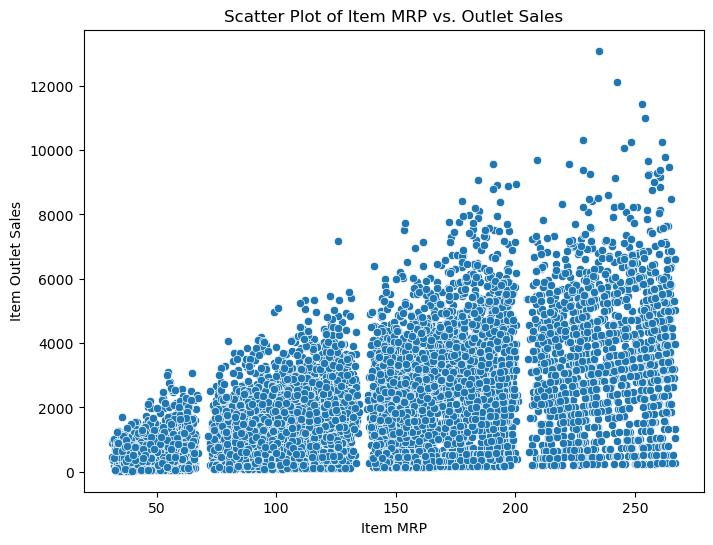

In [79]:
# Scatter plot of Item MRP vs. Outlet Sales
# Shows relationship between item price (MRP) and outlet sales, indicating pricing impact on sales.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=p_df)
plt.title('Scatter Plot of Item MRP vs. Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()


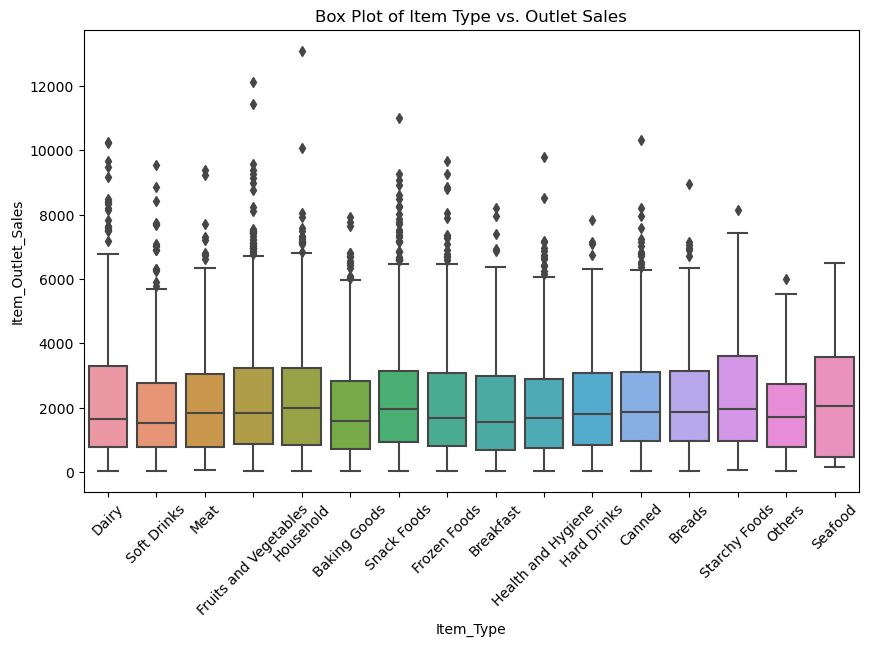

In [80]:
# Box plot of Item Type vs. Outlet Sales
# Compares sales for each item type, showing spread and identifying top-performing item types.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=p_df)
plt.title('Box Plot of Item Type vs. Outlet Sales')
plt.xticks(rotation=45)
plt.show()


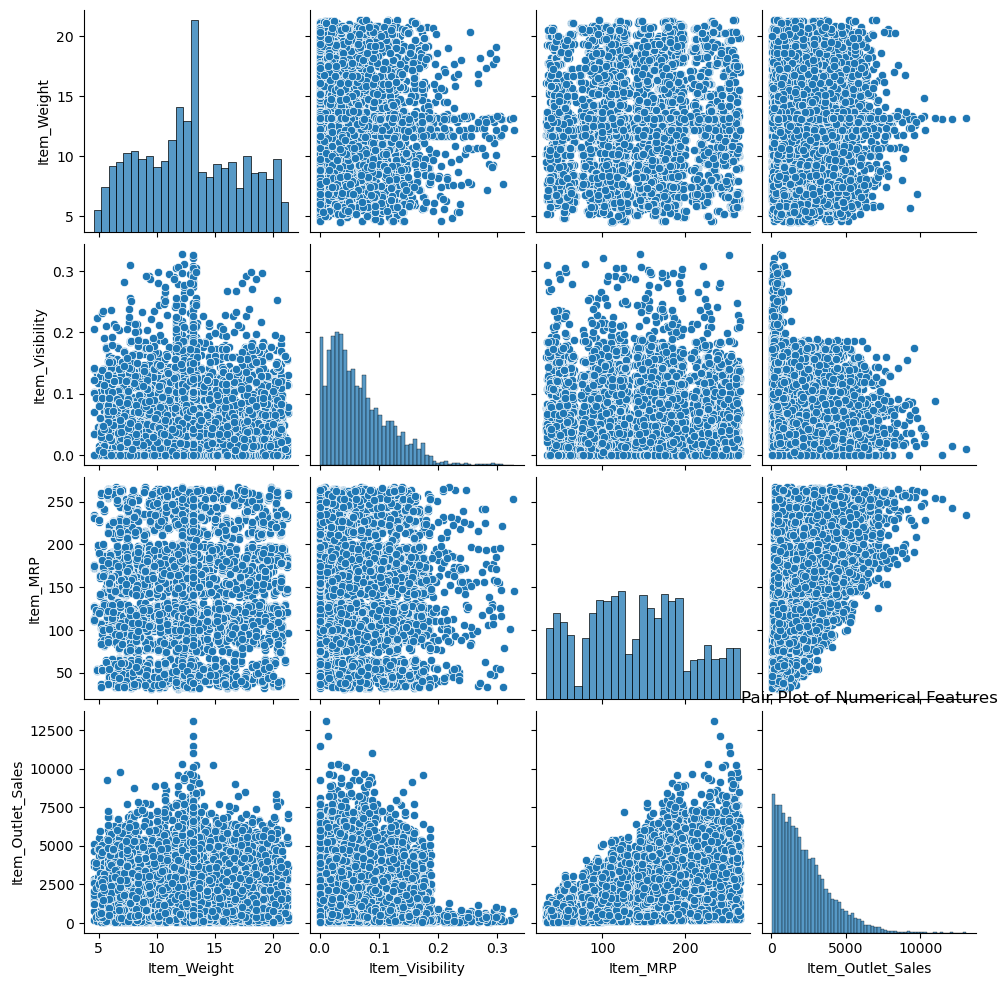

In [81]:
# Pair plot for numerical features
# Shows pairwise relationships for numerical features, useful for spotting trends or correlations.

sns.pairplot(p_df[numerical_features])
plt.title('Pair Plot of Numerical Features')
plt.show()
